In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Wczytywanie dataset, z których będziemy korzystać

Naszym celem jest stworzenie wykresu przepływowego.

In [323]:
main=pd.read_csv('pokemon_data.csv')

evol=pd.read_csv('evolution_stage_map.csv')

paths=pd.read_csv('evolution_paths.csv')

In [324]:
paths

,Stage 1,Stage 2,Stage 3
0,Bulbasaur,Ivysaur,Venusaur
1,Charmander,Charmeleon,Charizard
2,Squirtle,Wartortle,Blastoise
3,Caterpie,Metapod,Butterfree
4,Weedle,Kakuna,Beedrill
...,...,...,...
563,Raging-bolt,NaN,NaN
564,Iron-crown,NaN,NaN
565,Iron-boulder,NaN,NaN
566,Terapagos,NaN,NaN


In [325]:
#..dane z API i dane z pliku pokemon_data.csv różnią się nazwami pokemon - np. Nidoran♀ (female) i Nidoran-f. Poniższa funkcja normalizuje nazwy pokemon - usuwa z nich znaki jak niżej. Po zastosowaniu tej funkcji, a następnie merge how='inner' otrzymujemy 1025 wierszy, czyli tyle, ile miało być.
def normalize_name(name):
    name = str(name).lower()
    name = name.replace('♀ (female)', '-f')
    name = name.replace('♂ (male)', '-m')
    name = name.replace('é', 'e')   # np. Flabébé -> flabebe
    name = name.replace('.', '')    # np. Mr. Mime -> mr-mime
    name = name.replace("'", '')    # np. Farfetch'd -> farfetchd
    name = name.replace(':', '')    # np. Type: Null -> type-null
    name = name.replace(' ', '-')   
    return name


In [326]:
#..tworzymy klucz do łączenia w obu ramkach danych
main['merge_key'] = main['name'].apply(normalize_name)
evol['merge_key'] = evol['name'].apply(normalize_name)

#..łączymy po nowym kluczu
df = pd.merge(main, evol, on='merge_key', how='inner')
df


,dexnum,name_x,generation,type1,type2,species,height,weight,ability1,ability2,...,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,merge_key,name_y,Evolution_Stage
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,bulbasaur,Bulbasaur,1
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,ivysaur,Ivysaur,2
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,venusaur,Venusaur,3
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,charmander,Charmander,1
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,charmeleon,Charmeleon,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox,raging-bolt,Raging-bolt,1
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,iron-boulder,Iron-boulder,1
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,iron-crown,Iron-crown,1
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary,terapagos,Terapagos,1


In [327]:
#..użyliśmy merge po kluczu, więc pandas stworzyło kolumny name_y i name_x - są takie same, więc jedną usuniemy i dla drugiej zmienimy nazwę. Ponadto usuniemy merge_key
df = df.drop(columns=['name_y'])
df = df.rename(columns={'name_x': 'name'})

#..upewniamy się, że Evolution_Stage to float, nie int
df['Evolution_Stage'] = df['Evolution_Stage'].astype(int)


In [328]:
df['Dual type'] = df['type2'].notna()
df

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,merge_key,Evolution_Stage,Dual type
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,bulbasaur,1,True
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,ivysaur,2,True
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,venusaur,3,True
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,charmander,1,False
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,charmeleon,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox,raging-bolt,1,True
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,iron-boulder,1,True
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,iron-crown,1,True
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary,terapagos,1,False


In [329]:
paths['Evolves to stage 2'] = paths['Stage 2'].notna()
paths['Evolves to stage 3'] = paths['Stage 3'].notna()


paths['merge_key'] = paths['Stage 1'].apply(normalize_name)


df2 = pd.merge(df, paths, on='merge_key', how='inner')
df2




,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,egg_cycles,special_group,merge_key,Evolution_Stage,Dual type,Stage 1,Stage 2,Stage 3,Evolves to stage 2,Evolves to stage 3
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,20,Ordinary,bulbasaur,1,True,Bulbasaur,Ivysaur,Venusaur,True,True
1,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,20,Ordinary,charmander,1,False,Charmander,Charmeleon,Charizard,True,True
2,7,Squirtle,1,Water,NaN,Tiny Turtle Pokémon,0.5,9.0,Torrent,Rain Dish,...,20,Ordinary,squirtle,1,False,Squirtle,Wartortle,Blastoise,True,True
3,10,Caterpie,1,Bug,NaN,Worm Pokémon,0.3,2.9,Shield Dust,Run Away,...,15,Ordinary,caterpie,1,False,Caterpie,Metapod,Butterfree,True,True
4,13,Weedle,1,Bug,Poison,Hairy Bug Pokémon,0.3,3.2,Shield Dust,Run Away,...,15,Ordinary,weedle,1,True,Weedle,Kakuna,Beedrill,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,—,Ancient Paradox,raging-bolt,1,True,Raging-bolt,NaN,NaN,False,False
564,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,—,Future Paradox,iron-boulder,1,True,Iron-boulder,NaN,NaN,False,False
565,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,—,Future Paradox,iron-crown,1,True,Iron-crown,NaN,NaN,False,False
566,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,—,Legendary,terapagos,1,False,Terapagos,NaN,NaN,False,False


In [337]:
# 1. KROK KLUCZOWY: Bierzemy tylko Pokémony bazowe (Stage 1)
# To eliminuje duplikaty logiczne (nie analizujemy Charizarda, tylko Charmandera)
df_final = df[df['Evolution_Stage'] == 1].copy()

# 2. Przygotowanie flag w paths
# Upewniamy się, że mamy kolumny logiczne (True/False)
paths['Evolves to stage 2'] = paths['Stage 2'].notna()
paths['Evolves to stage 3'] = paths['Stage 3'].notna()

# 3. Agregacja paths (Dla ewolucji rozgałęzionych jak Applin czy Eevee)
# Jeśli Applin ma ścieżkę do Stage 2 (Flapple) i inną do Stage 3 (Hydrapple),
# chcemy wiedzieć, że OGÓLNIE ma potencjał na Stage 3.
# Groupby + max() weźmie True, jeśli chociaż jedna ścieżka ma ewolucję.
paths_agg = paths.groupby('Stage 1')[['Evolves to stage 2', 'Evolves to stage 3']].max().reset_index()

# 4. Klucz do łączenia (normalizacja, tak jak robiłaś)
paths_agg['merge_key'] = paths_agg['Stage 1'].apply(normalize_name)

# 5. Łączenie (Left Join)
# Do naszych bazowych Pokémonów (df_final) doklejamy info, czy ewoluują.
# Używamy left join, bo jeśli Pokémona nie ma w paths (brak ewolucji), chcemy go zachować.
df_final = pd.merge(df_final, 
                    paths_agg[['merge_key', 'Evolves to stage 2', 'Evolves to stage 3']], 
                    on='merge_key', 
                    how='left')

# 6. Wypełnienie braków (Pokémony bez ewolucji dostaną False zamiast NaN)
df_final['Evolves to stage 2'] = df_final['Evolves to stage 2'].fillna(False)
df_final['Evolves to stage 3'] = df_final['Evolves to stage 3'].fillna(False)

# --- 1. Przygotowanie mapy typów ---
# Tworzymy słownik: { 'nazwa-znormalizowana': True/False }
# Sprawdzamy czy 'type2' nie jest puste (notna)
df['is_dual'] = df['type2'].notna()

# Tworzymy mapę używając znormalizowanych nazw, żeby uniknąć problemów z 'Mr. Mime' itp.
# (Zakładam, że funkcja normalize_name jest już zdefiniowana w Twoim kodzie)
type_map = pd.Series(df.is_dual.values, index=df['name'].apply(normalize_name)).to_dict()

# --- 2. Mapowanie w ramce paths ---
# Musimy znormalizować nazwy w Stage 2/3 przed mapowaniem, dla pewności
paths['Stage 2 Clean'] = paths['Stage 2'].apply(lambda x: normalize_name(x) if pd.notna(x) else None)
paths['Stage 3 Clean'] = paths['Stage 3'].apply(lambda x: normalize_name(x) if pd.notna(x) else None)

# Sprawdzamy, czy ewolucje są dwutypowe (mapujemy True/False)
paths['Is stage 2 evolution dual type?'] = paths['Stage 2 Clean'].map(type_map)
paths['Is stage 3 evolution dual type?'] = paths['Stage 3 Clean'].map(type_map)

# --- 3. Agregacja (Groupby) ---
# Dodajemy nowe kolumny do listy agregowanej.
# Używamy 'max()', co działa jak 'any()': 
# Jeśli Gloom ewoluuje w Vileplume (Dual) ORAZ Bellossom (Mono), 
# to wynik będzie True (bo ma opcję bycia Dual).
agg_cols = {
    'Evolves to stage 2': 'max',
    'Evolves to stage 3': 'max',
    'Is stage 2 evolution dual type?': 'max',
    'Is stage 3 evolution dual type?': 'max'
}

paths_agg = paths.groupby('Stage 1').agg(agg_cols).reset_index()

# --- 4. Łączenie z df_final (tak jak wcześniej) ---
paths_agg['merge_key'] = paths_agg['Stage 1'].apply(normalize_name)

# Bierzemy tylko bazowe formy z głównego df
df_final = df[df['Evolution_Stage'] == 1].copy()
df_final['merge_key'] = df_final['name'].apply(normalize_name)

df_final = pd.merge(df_final, 
                    paths_agg, 
                    on='merge_key', 
                    how='left')

# --- 5. Czyszczenie NaN ---
# Jeśli Pokémon nie ma ewolucji, to nie jest ona Dual Type -> wypełniamy False
cols_to_fix = ['Evolves to stage 2', 'Evolves to stage 3', 
               'Is stage 2 evolution dual type?', 'Is stage 3 evolution dual type?']
df_final[cols_to_fix] = df_final[cols_to_fix].fillna(False)

# Sprawdzenie

df_final

/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_42330/789737551.py:79: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[cols_to_fix] = df_final[cols_to_fix].fillna(False)


,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,special_group,merge_key,Evolution_Stage,Dual type,is_dual,Stage 1,Evolves to stage 2,Evolves to stage 3,Is stage 2 evolution dual type?,Is stage 3 evolution dual type?
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,Ordinary,bulbasaur,1,True,True,Bulbasaur,True,True,True,True
1,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,Ordinary,charmander,1,False,False,Charmander,True,True,False,True
2,7,Squirtle,1,Water,NaN,Tiny Turtle Pokémon,0.5,9.0,Torrent,Rain Dish,...,Ordinary,squirtle,1,False,False,Squirtle,True,True,False,False
3,10,Caterpie,1,Bug,NaN,Worm Pokémon,0.3,2.9,Shield Dust,Run Away,...,Ordinary,caterpie,1,False,False,Caterpie,True,True,False,True
4,13,Weedle,1,Bug,Poison,Hairy Bug Pokémon,0.3,3.2,Shield Dust,Run Away,...,Ordinary,weedle,1,True,True,Weedle,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,Ancient Paradox,raging-bolt,1,True,True,Raging-bolt,False,False,False,False
537,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,Future Paradox,iron-boulder,1,True,True,Iron-boulder,False,False,False,False
538,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,Future Paradox,iron-crown,1,True,True,Iron-crown,False,False,False,False
539,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,Legendary,terapagos,1,False,False,Terapagos,False,False,False,False


## Tworzenie wykresu
Zdecydowałyśmy się na stworzenie funkcji generującej wykres zbiorów równoległych. W ten sposób mogłyśmy później w łatwy sposób wygenerować wiele wykresów, by znaleźć wśród nich najciekawsze.

In [331]:
def parallel_sets_vertical(df, title, cat_cols, color_col=None, cmap='Set1'):
    """
    Rysuje wykres Parallel Categories z przepływem z GÓRY na DÓŁ (Vertical).
    """
    
    # 1. Agregacja danych
    df_agg = df.groupby(cat_cols).size().reset_index(name='__count__')
        
    # Sortowanie
    sort_cols = [color_col] + cat_cols if color_col else cat_cols
    df_agg = df_agg.sort_values(by=sort_cols, ascending=False)
    
    # 2. Obliczanie pozycji X (szerokości) dla bloków kategorii
    # Teraz kategorie są na osi Y, a ich szerokość na osi X zależy od liczności
    x_starts = {}
    total_count = df_agg['__count__'].sum()
    gap = total_count * 0.05  # 5% odstępu między kategoriami w poziomie
    
    for col in cat_cols:
        cat_counts = df_agg.groupby(col)['__count__'].sum()
        sorted_cats = sorted(cat_counts.index, reverse=True) # Sortowanie etykiet
        
        current_x = 0
        x_starts[col] = {}
        # Układamy kategorie od lewej do prawej
        for cat in sorted_cats:
            x_starts[col][cat] = current_x
            current_x += cat_counts[cat] + gap

    # Kursor śledzi, na jakiej szerokości (X) jesteśmy wewnątrz każdego bloku
    x_cursors = {col: x_starts[col].copy() for col in cat_cols}
    
    # 3. Rysowanie
    # Zmieniamy wymiary figury, żeby była wyższa niż szersza (lepiej pasuje do pionowego flow)
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # --- KOLORY ---
    if color_col:
        unique_vals = sorted(df_agg[color_col].unique())
        cmap_obj = plt.get_cmap(cmap)
        color_lookup = {val: cmap_obj(i % cmap_obj.N) for i, val in enumerate(unique_vals)}
    
    # --- ZMODYFIKOWANA SIGMOIDA (Pionowa) ---
    def get_vertical_sigmoid_points(y_start, y_end, x_start, x_end, steps=100):
        # t idzie liniowo od 0 do 1 (reprezentuje postęp w pionie, Y)
        t = np.linspace(0, 1, steps)
        
        # Y zmienia się liniowo od y_start do y_end
        y = y_start + (y_end - y_start) * t
        
        # Sigmoida steruje zmianą X (szerokości)
        sigmoid = 1 / (1 + np.exp(-12 * (t - 0.5)))
        x = x_start + (x_end - x_start) * sigmoid
        
        return x, y

    # Rysujemy wstęgę
    for _, row in df_agg.iterrows():
        count = row['__count__']
        
        if color_col:
            color = color_lookup[row[color_col]]
        else:
            color = 'gray'
            
        for i in range(len(cat_cols) - 1):
            col1, col2 = cat_cols[i], cat_cols[i+1]
            val1, val2 = row[col1], row[col2]
            
            # Pobieramy pozycje startowe X (szerokość)
            x1 = x_cursors[col1][val1]
            x2 = x_cursors[col2][val2]
            
            # Pozycje Y to po prostu indeksy kolumn (0, 1, 2...)
            y_start_level = i
            y_end_level = i + 1
            
            # Obliczamy krzywe (zwracają tablice x i y)
            # x_left_curve to lewa krawędź wstęgi
            x_left_curve, y_coords = get_vertical_sigmoid_points(y_start_level, y_end_level, x1, x2)
            
            # x_right_curve to prawa krawędź wstęgi (przesunięta o count)
            x_right_curve, _ = get_vertical_sigmoid_points(y_start_level, y_end_level, x1 + count, x2 + count)
            
            # ZMIANA: fill_betweenx zamiast fill_between
            # Wypełniamy obszar wzdłuż osi Y, pomiędzy krzywą lewą (x_left) a prawą (x_right)
            ax.fill_betweenx(y_coords, x_left_curve, x_right_curve, color=color, alpha=0.6, edgecolor=None)
            
            if i == len(cat_cols) - 2 and count > 5:
                # Ustawiamy X dokładnie na prawej krawędzi strumienia
                text_x = x2 + count
                
                # Ustawiamy Y: poziom docelowy (i+1) minus margines
                text_y = i + 1 - 0.01
                
                ax.text(text_x, text_y, 
                        f"{int(count)}", 
                        ha='right',       # Wyrównanie do prawej (tekst wewnątrz paska)
                        va='bottom',    
                        fontsize=9, 
                        color='black',    
                        rotation=0) 
            # --------------------------------
        # Aktualizacja kursorów X
        for col in cat_cols:
            x_cursors[col][row[col]] += count

    # 4. Opisy osi i etykiet
    for i, col in enumerate(cat_cols):
        # Tytuł Kategorii
        ax.text(0, i - 0.05, col, ha='left', va='bottom', fontweight='bold', fontsize=16)

        # Iterujemy po wartościach kategorii (belki i etykiety) - TYLKO RAZ
        for cat, start_x in x_starts[col].items():

            w = df_agg[df_agg[col] == cat]['__count__'].sum()
            center_x = start_x + w / 2
            
            # Czarna belka
            ax.barh(i, w, left=start_x, height=0.02, color='black', alpha=1, align='center')
            
            # Etykieta (usunięto zagnieżdżoną pętlę for cat... która była tutaj zbędna)
            ax.text(start_x, i - 0.01, str(cat), ha='left', va='bottom', fontsize=11, fontweight='normal')
            

    #..wyłączenie osi
    ax.axis('off')
    
    #..odwrócenie osi Y - tak, aby przepływ był z góry na dół
    ax.invert_yaxis()

    #tytuł ręcznie - również do lewej
    ax.text(0, -0.2, title, fontsize=25, ha='left') 
    
    plt.tight_layout()
    plt.savefig('ParallelSets.png')
    plt.show()
    


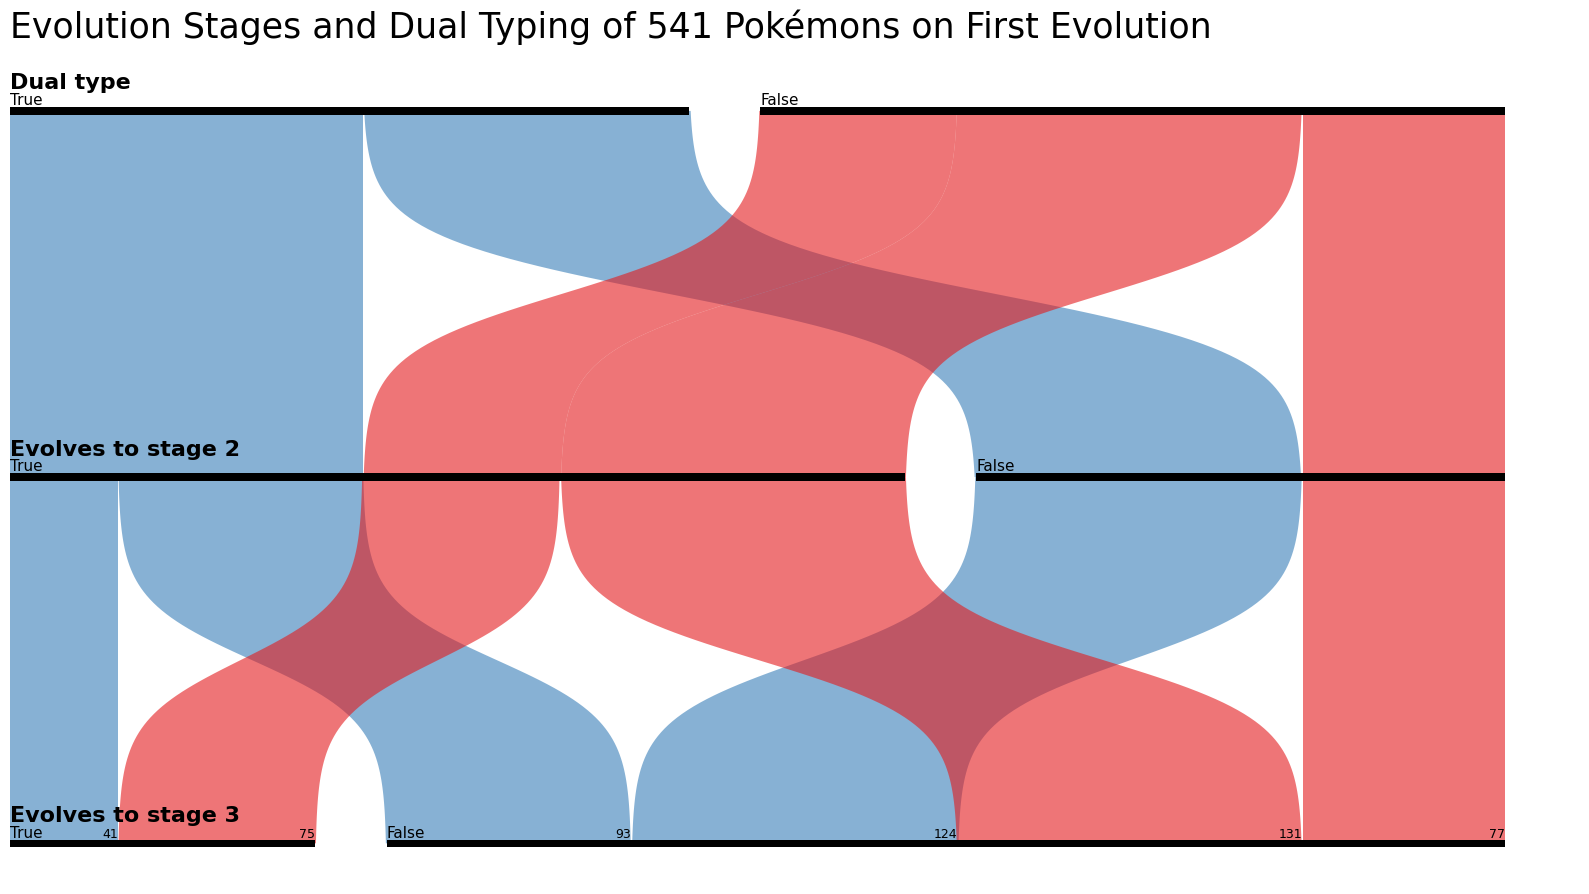

In [341]:
parallel_sets_vertical(df_final, title='Evolution Stages and Dual Typing of 541 Pokémons on First Evolution', cat_cols=['Dual type','Evolves to stage 2', 'Evolves to stage 3'], color_col='Dual type', cmap='Set1')


In [382]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# --- 1. KONFIGURACJA DANYCH (Zbiór df_final) ---
# (Zakładam, że df_final masz już wczytany z poprzednich kroków)
# Tworzymy kopię do wizualizacji, żeby nie psuć oryginału
df_viz = df_final.copy()

# === KLUCZOWA POPRAWKA LOGICZNA ===
# Jeśli Pokemon NIE ewoluuje do Stage 2, to pytanie "Czy Stage 2 jest Dual?" nie ma sensu (jest NaN).
# Wcześniej było tu False, co sztucznie pompowało kategorię "False" w danych.
df_viz.loc[df_viz['Evolves to stage 2'] == False, 'Is stage 2 evolution dual type?'] = np.nan
df_viz.loc[df_viz['Evolves to stage 3'] == False, 'Is stage 3 evolution dual type?'] = np.nan

# Definicja poziomów
levels = [
    'Dual type', 
    'Evolves to stage 2', 
    'Is stage 2 evolution dual type?', 
    'Evolves to stage 3', 
    'Is stage 3 evolution dual type?'
]

# Kolory
color_map = {
    'True_node': "#3b8bba",    
    'False_node': "#d95f5f",   
    'True_link': "rgba(59, 139, 186, 0.4)", 
    'False_link': "rgba(217, 95, 95, 0.4)"  
}

# --- 2. GENEROWANIE WĘZŁÓW (NODES) ---
labels = []
colors = []
x_nodes = []
y_nodes = []
node_indices = {}
counter = 0

for i, col in enumerate(levels):
    # Iterujemy tylko po True/False (NaN są automatycznie pomijane)
    for val in [True, False]:
        unique_id = f"{col}_{val}"
        node_indices[unique_id] = counter
        
        # Etykieta z licznikiem (dla pewności)
        # count = len(df_viz[df_viz[col] == val])
        # label_text = f"{col}<br>{val} (n={count})"
        label_text = f"{col}<br>{val}"
        labels.append(label_text)
        
        # Kolor
        colors.append(color_map['True_node'] if val else color_map['False_node'])
        
        # Pozycja X
        x_nodes.append(i / (len(levels) - 1))
        
        # --- POZYCJA Y (WYMUSZENIE TRUE NA GÓRZE) ---
        # Plotly: 0.0 = Góra, 1.0 = Dół
        
        if i == 0: # Dual Type
            # Ekstremalne wartości, żeby się nie zamieniły
            y_nodes.append(0.01 if val else 0.99)
            
        elif "Evolves to" in col:
            if val: 
                y_nodes.append(0.1)  # True (Główny nurt) - wysoko
            else:   
                y_nodes.append(0.99) # False (Odpady) - na samym dnie
                
        elif "Is" in col and "dual" in col:
            # Tutaj są tylko te, które przetrwały (nie ma tu odpadów z poprzedniego kroku dzięki NaN)
            if val:
                y_nodes.append(0.05) # Dual
            else:
                y_nodes.append(0.25) # Mono
                
        counter += 1

# --- 3. GENEROWANIE POŁĄCZEŃ (LINKS) ---
source = []
target = []
value = []
link_colors = []

for i in range(len(levels) - 1):
    col_source = levels[i]
    col_target = levels[i+1]
    
    # Pandas groupby automatycznie ignoruje NaN, więc "martwe" ścieżki znikają same!
    flow = df_viz.groupby([col_source, col_target]).size().reset_index(name='count')
    
    for _, row in flow.iterrows():
        src_val = row[col_source]
        tgt_val = row[col_target]
        count = row['count']
        
        # Dodatkowe zabezpieczenie: Ewolucja False to ślepy zaułek
        if "Evolves to" in col_source and src_val == False:
            continue
            
        # Znajdź indeksy węzłów
        try:
            src_idx = node_indices[f"{col_source}_{src_val}"]
            tgt_idx = node_indices[f"{col_target}_{tgt_val}"]
        except KeyError:
            continue # Jeśli węzeł nie istnieje (np. NaN), pomiń
        
        source.append(src_idx)
        target.append(tgt_idx)
        value.append(count)
        link_colors.append(color_map['True_link'] if tgt_val else color_map['False_link'])

# --- 4. RYSOWANIE ---
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    node = dict(
        pad = 20, thickness = 20, line = dict(color = "black", width = 0.5),
        label = labels, color = colors, x = x_nodes, y = y_nodes
    ),
    link = dict(
        source = source, target = target, value = value, color = link_colors
    )
)])

fig.update_layout(
    title={
        'text': "<b>Evolution of Pokémons and Dual Types (541 Stage 1 Evolution Pokémons)</b>", # <b> pogrubia tekst (HTML)
        'y': 0.95,           # Pozycja pionowa
        'x': 0.5,            # Pozycja pozioma (0.5 to środek)
        'xanchor': 'center', # Punkt zakotwiczenia środka
        'yanchor': 'top',
        'font': dict(size=20)
    },
    font_size=12, 
    width=1600, height=800,
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=100, b=150)
)

fig.write_image("pokemon_sankey.png", scale=3)
fig.show()

/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_42330/2232775980.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_42330/2232775980.py:14: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

